In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import montage
from IPython.display import display

# Ajuste de visualização
plt.rcParams["figure.figsize"] = (8, 8)

# Caminho das pastas
pasta_entrada = "../dataset_processado"
csv_path = os.path.join(pasta_entrada, "metadata.csv")

# Carregar o csv
meta = pd.read_csv(csv_path)
print(f"Metadata carregado: {meta.shape[0]} linhas") # Check pra ver se leu correto

Metadata carregado: 160 linhas


In [2]:
# Monta uma grid que exibe as imagens de cada class
def show_class_montage(class_name, n_images=16, n_cols=4):
    files = meta[meta.class_name == class_name].filename.tolist()[:n_images]
    imgs = [imread(os.path.join(pasta_entrada, f)) for f in files]
    if not imgs:
        print(f"(nenhuma imagem encontrada para {class_name})")
        return

    n = len(imgs)
    cols = min(n_cols, n)
    rows = math.ceil(n / cols)
    
    grid = montage(imgs, grid_shape=(rows, cols), channel_axis=-1)
    
    plt.imshow(grid)
    plt.axis("off")
    plt.title(f"Classe: {class_name} ({n} imagens exibidas)")
    plt.show()

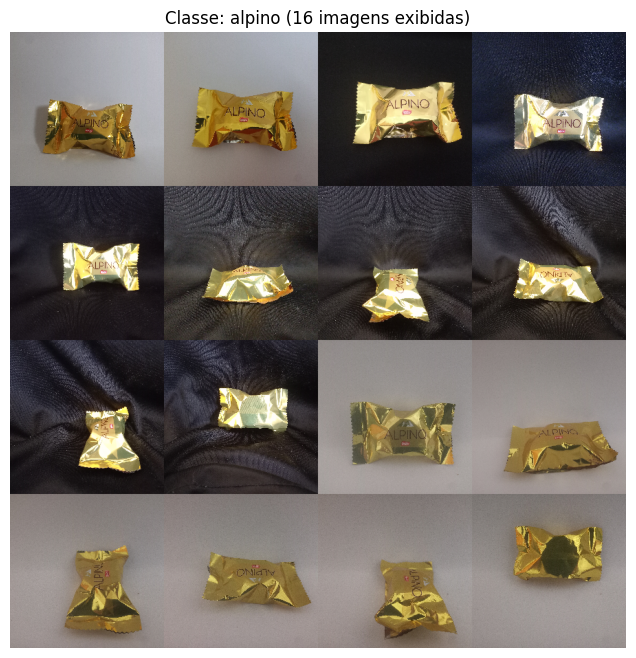

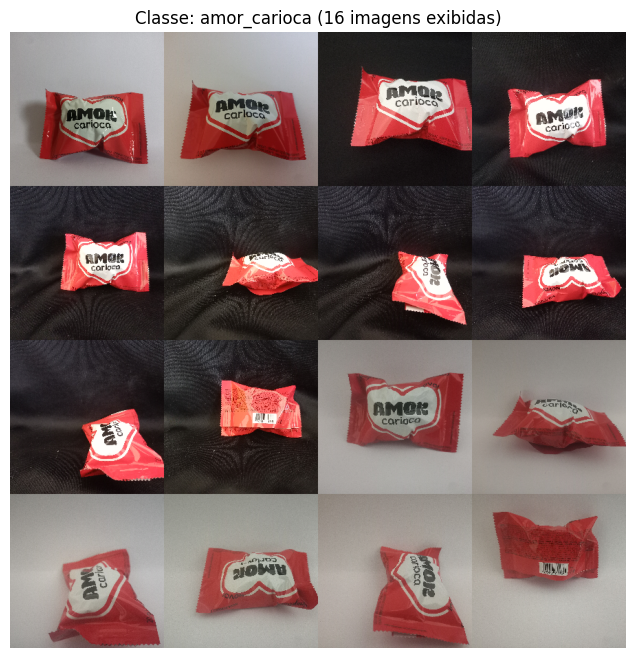

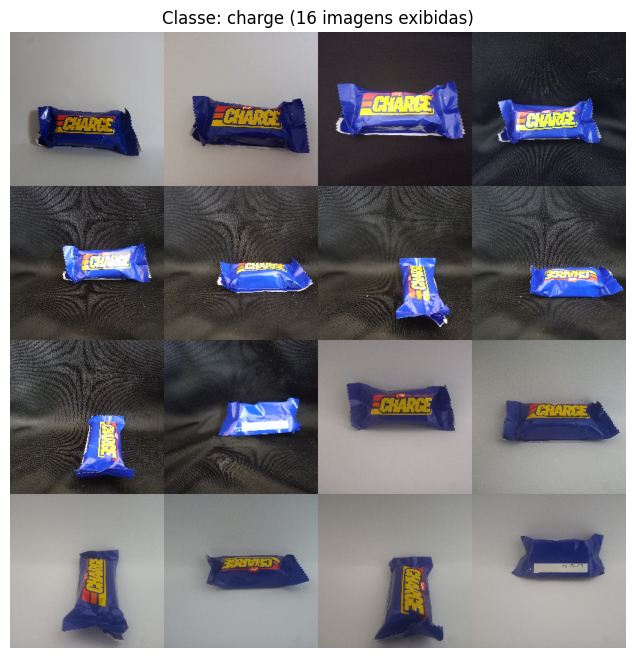

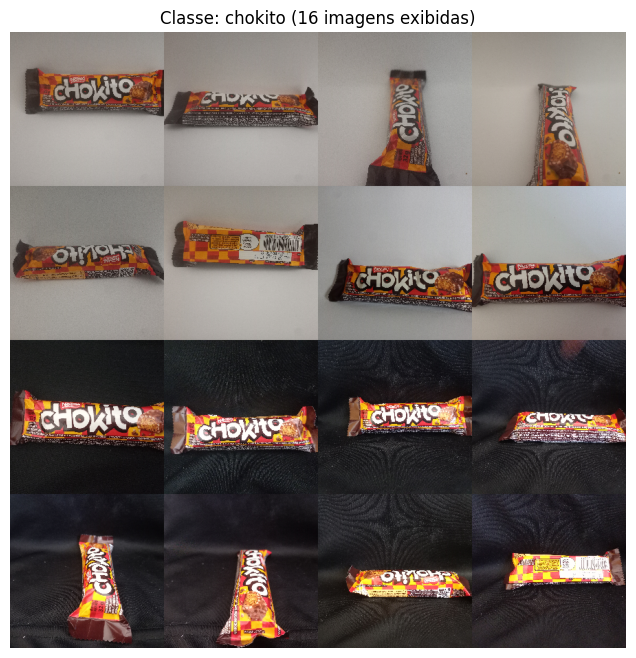

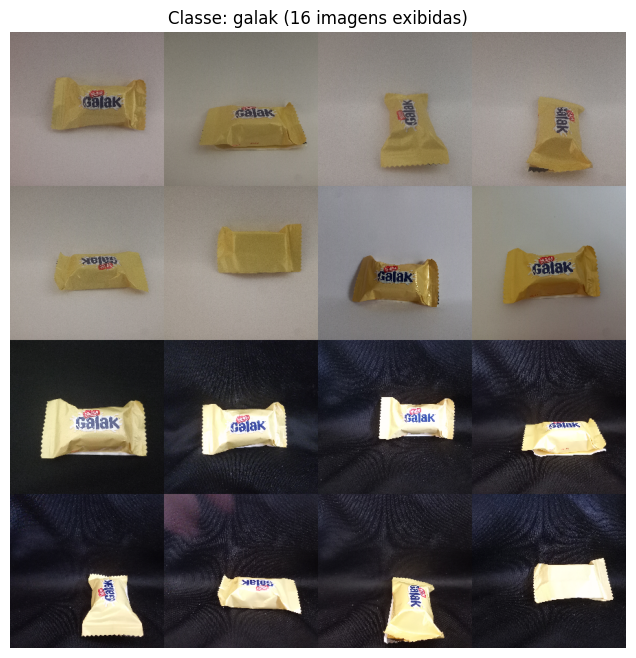

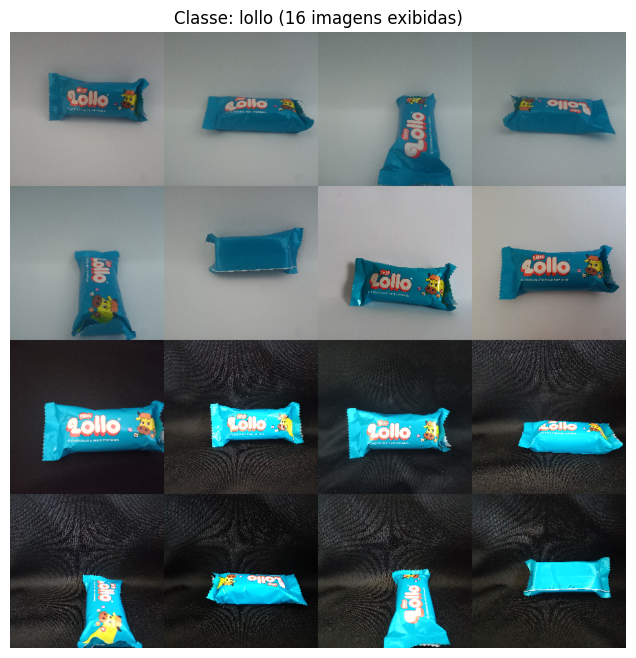

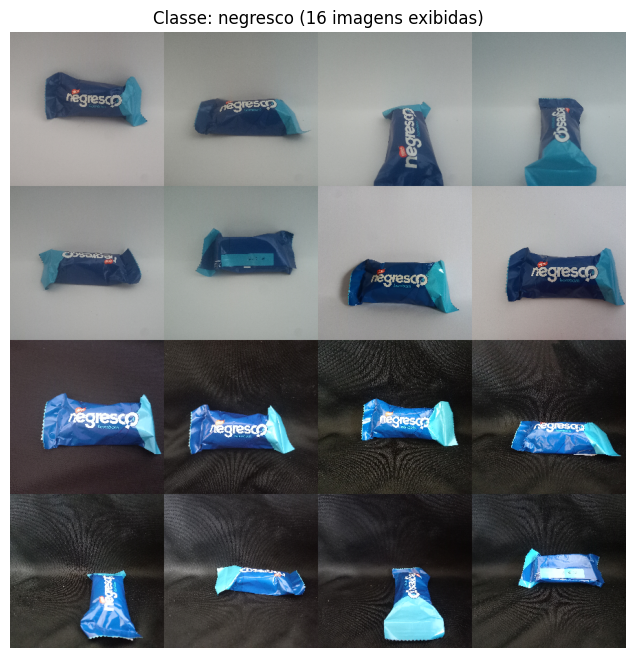

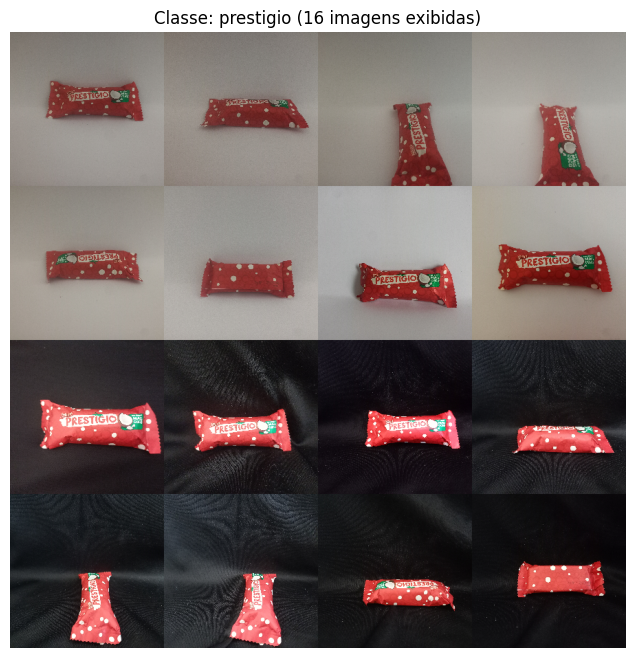

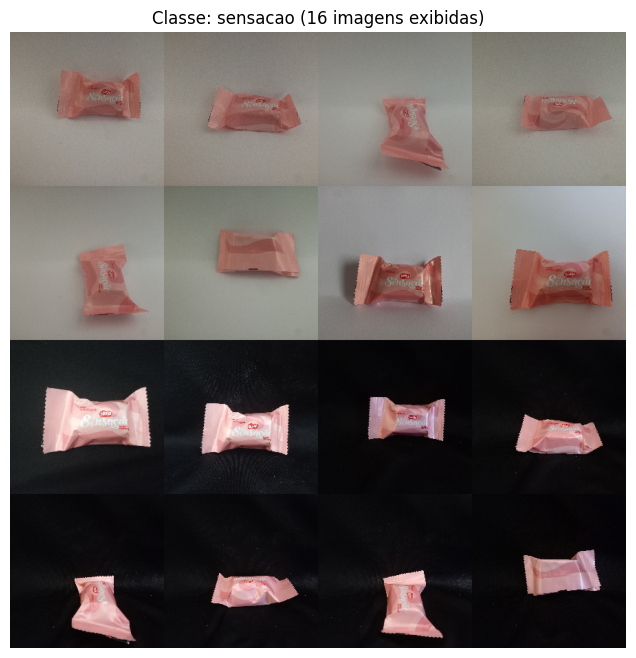

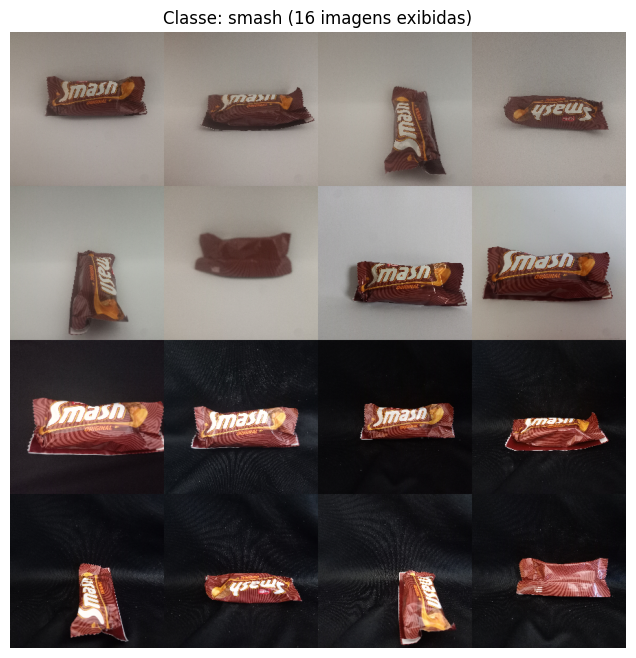

In [3]:
# Exibir as iamgens para cada classe
for cname in sorted(meta.class_name.unique()):
    show_class_montage(cname, n_images=16, n_cols=4)

In [4]:
# Função para mostrar os metadados
def show_metadata(head=1000):
    display(meta.head(head))

In [5]:
show_metadata()

filename class_name  class_id  image_id angle bg_color
0    alpino\0-01-V1-W.png     alpino         0         1    V1        W
1    alpino\0-02-V1-W.png     alpino         0         2    V1        W
2    alpino\0-03-V1-B.png     alpino         0         3    V1        B
3    alpino\0-04-V1-B.png     alpino         0         4    V1        B
4    alpino\0-05-V1-B.png     alpino         0         5    V1        B
..                    ...        ...       ...       ...   ...      ...
155   smash\9-12-V2-W.png      smash         9        12    V2        W
156   smash\9-13-V3-W.png      smash         9        13    V3        W
157   smash\9-14-V4-W.png      smash         9        14    V4        W
158   smash\9-15-V5-W.png      smash         9        15    V5        W
159   smash\9-16-V6-W.png      smash         9        16    V6        W

[160 rows x 6 columns]